**실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(0)

In [3]:
# y = 4x + 6 식을 근사(w1 = 4, w0 = 6), random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

In [4]:
print(X)
print('-' * 30)
print(y)

[[1.09762701]
 [1.43037873]
 [1.20552675]
 [1.08976637]
 [0.8473096 ]
 [1.29178823]
 [0.87517442]
 [1.783546  ]
 [1.92732552]
 [0.76688304]
 [1.58345008]
 [1.05778984]
 [1.13608912]
 [1.85119328]
 [0.14207212]
 [0.1742586 ]
 [0.04043679]
 [1.66523969]
 [1.5563135 ]
 [1.7400243 ]
 [1.95723668]
 [1.59831713]
 [0.92295872]
 [1.56105835]
 [0.23654885]
 [1.27984204]
 [0.28670657]
 [1.88933783]
 [1.04369664]
 [0.82932388]
 [0.52911122]
 [1.54846738]
 [0.91230066]
 [1.1368679 ]
 [0.0375796 ]
 [1.23527099]
 [1.22419145]
 [1.23386799]
 [1.88749616]
 [1.3636406 ]
 [0.7190158 ]
 [0.87406391]
 [1.39526239]
 [0.12045094]
 [1.33353343]
 [1.34127574]
 [0.42076512]
 [0.2578526 ]
 [0.6308567 ]
 [0.72742154]
 [1.14039354]
 [0.87720303]
 [1.97674768]
 [0.20408962]
 [0.41775351]
 [0.32261904]
 [1.30621665]
 [0.50658321]
 [0.93262155]
 [0.48885118]
 [0.31793917]
 [0.22075028]
 [1.31265918]
 [0.2763659 ]
 [0.39316472]
 [0.73745034]
 [1.64198646]
 [0.19420255]
 [1.67588981]
 [0.19219682]
 [1.95291893]
 [0.93

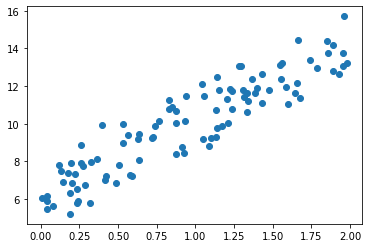

In [5]:
# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [6]:
X.shape, y.shape

((100, 1), (100, 1))

In [7]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
        
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [8]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

In [9]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [10]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


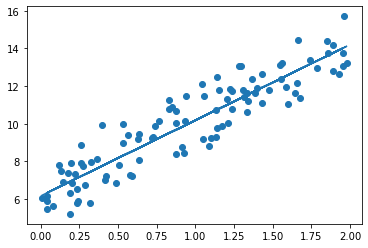

In [11]:
plt.scatter(X, y)
plt.plot(X,y_pred)

In [12]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [13]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [14]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
X = np.arange(4).reshape(2, 2)

In [17]:
X

array([[0, 1],
       [2, 3]])

In [23]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)

In [24]:
poly_ftr

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [27]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]
3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [29]:
from sklearn.pipeline import Pipeline

In [31]:
def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:, 0]**2 + 4 * X[:, 1]**3
    return y

In [38]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                   ('linear', LinearRegression())])

In [39]:
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
